In [1]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [5]:
caffe_root = '/Users/cngan/premise/caffe/'  # this file is expected to be in {caffe_root}/examples
model_path = 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [9]:
# load up the caffe model
net = caffe.Net(
    caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt',
    caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
    caffe.TEST
    )

In [34]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
net.blobs['data'].reshape(50,3,227,227)

In [35]:

transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB


In [61]:
np.append(net.blobs['data'].data,
    [transformer.preprocess('data', caffe.io.load_image('/Users/cngan/Pictures/Wallpapers/Coffee/night_coffee-wallpaper-1280x1024.jpg')),
     transformer.preprocess('data', caffe.io.load_image(caffe_root + 'examples/images/cat.jpg'))
     ])
out = net.forward()
print out['prob'].argmax()

722


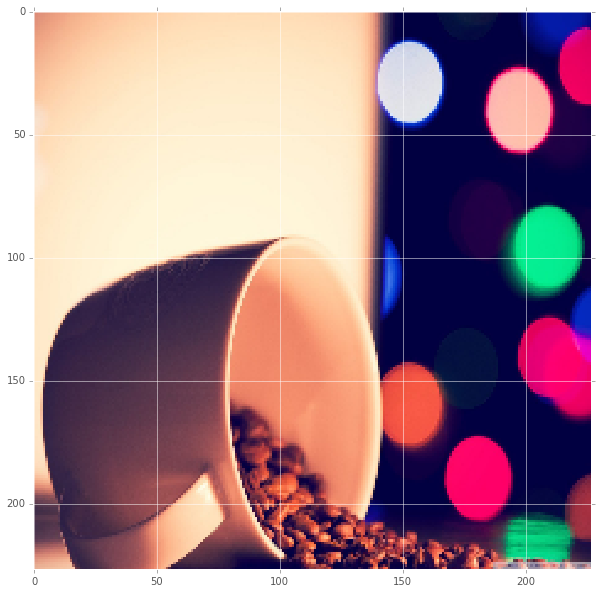

In [70]:
plt.imshow(transformer.deprocess('data', net.blobs['data'].data[49]))

In [43]:
# load labels
imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
try:
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')
except:
    !../data/ilsvrc12/get_ilsvrc_aux.sh
    labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')

# sort top k predictions from softmax output
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
print labels[top_k]

['n03942813 ping-pong ball' 'n03935335 piggy bank, penny bank'
 'n07930864 cup' 'n04116512 rubber eraser, rubber, pencil eraser'
 'n02782093 balloon']


In [58]:
net.blobs['data'].data.__class__

numpy.ndarray